En primer lugar cargamos ambos conjunto de datos.

In [1]:
import pandas as pd

df_fraude = pd.read_csv('df_1.csv', error_bad_lines=False)
df_comunas=pd.read_csv('df_2.csv', error_bad_lines=False, encoding='cp1252', delimiter=';')

Luego ordenamos las columnas de manera que las primeras columnas sean del tipo cuantitativa (enteros o flotantes) y las demas sean columnas del tipo cualitativo tanto nominales como ordinales. A continuación cambiamos los nombres de las columnas originales mediante la función _rename_ de pandas. Como se muestra a continuación

In [30]:
#Conjunto que muestra datos historicos de clientes
df_comunas_rename = df_comunas.rename(
    columns = {
        'columna_num_1':'feature_1', 'columna_categ_2':'feature_2'
    }
)

#Conjunto que contiene a clientes que han cometido fraude
df_fraude_rename = df_fraude.rename(
    columns = {
        'columna_num_1':'feature_1', 'columna_categ_2':'feature_2'
    }
)

Luego agregamos la columna clasificadora entregando asi una etiqueta a cada registro para asi poder ver la proproción de clientes fraudulentos

In [31]:
#Agregamos columna con datos binarios para clasificar clientes combinando ambas dataframe
df_comunas_rename['target']= "No Fraude"

for k in df_fraude.index:
    id_cliente = df_fraude_rename['feature_1'][k]
    num_cliclo = df_fraude_rename['feature_4'][k]
    df_comunas_rename.loc[df_comunas_rename[(df_comunas_rename['feature_2'] == id_cliente) & (df_comunas_rename['feature_1']==num_cliclo)].index[0], 'target'] = "Fraude"

### **Analisis Exploratorio**


En primer lugar debemos apreciar el tamaño de nuestra Base de Datos, para ver a que nos estamos enfrentando y asi poder tomar una mejor desición en la elección del modelo.

In [35]:
print('la dimensión de los datos de clientes etiquetados es', df_clientes_clasification.shape)

la dimensión de los datos de clientes etiquetados es (736771, 17)


Ahora veamos si exiten columnas con algun dato en blanco o valores faltantes

In [36]:
df_clientes_clasification.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
target        0
dtype: int64

Ahora veamos cuanta información existe en cada columna.

In [37]:
df_clientes_clasification.nunique()

feature_1       85
feature_2     9342
feature_3     1270
feature_4     1135
feature_5        7
feature_6        3
feature_7        2
feature_8        7
feature_9        3
feature_10       3
feature_11      19
feature_12      12
feature_13       3
feature_14       1
feature_15       1
feature_16       1
target           2
dtype: int64

Ahora visualicemos los tipos de variables que vamos a trabajar:

In [38]:
df_clientes_clasification.dtypes

feature_1       int64
feature_2       int64
feature_3     float64
feature_4       int64
feature_5       int64
feature_6      object
feature_7      object
feature_8      object
feature_9      object
feature_10     object
feature_11     object
feature_12     object
feature_13     object
feature_14     object
feature_15     object
feature_16     object
target         object
dtype: object

Verificamos si existen datos NaN

In [39]:
df_clientes_clasification.isnull().values.any()

False

Graficamos la proporción de cada clase en el conjunto de datos

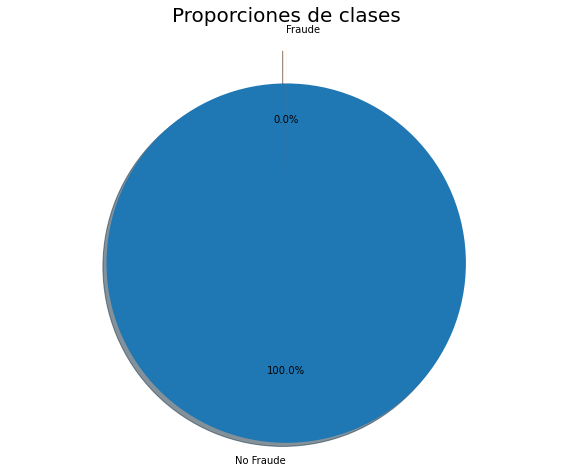

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = 'No Fraude', 'Fraude'
sizes = [df_clientes_clasification.target[df_clientes_clasification['target']=='No Fraude'].count(), df_clientes_clasification.target[df_clientes_clasification['target']=='Fraude'].count()]
explode = (0.1, 0.1)   
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proporciones de clases", size = 20)
plt.show()

Ahora veamos los datos estadisticos de las caracteristicas numericas del conjunto

In [184]:
round(df_clientes_clasification[['feature_1', 'feature_2', 'feature_3', 'feature_4']].describe(), 3)

,feature_1,feature_2,feature_3,feature_4
count,736771.000,736771.000,736771.000,736771.000
mean,0.512,0.690,0.002,0.003
std,0.293,0.196,0.012,0.014
min,0.000,0.000,0.000,0.000
25%,0.262,0.613,0.001,0.001
50%,0.524,0.616,0.002,0.002
75%,0.774,0.902,0.002,0.003
max,1.000,1.000,1.000,1.000


Normalizamos variables numericas

In [ ]:
minVec = df_clientes_clasification[['feature_1', 'feature_2', 'feature_3', 'feature_4']].min().copy()
maxVec = df_clientes_clasification[['feature_1', 'feature_2', 'feature_3', 'feature_4']].max().copy()
df_clientes_clasification[['feature_1', 'feature_2', 'feature_3', 'feature_4']] = (df_clientes_clasification[['feature_1', 'feature_2', 'feature_3', 'feature_4']]-minVec)/(maxVec-minVec)

Ahora veamos la distribución de los datos en ambas etiquetas para las caracteristicas numericas

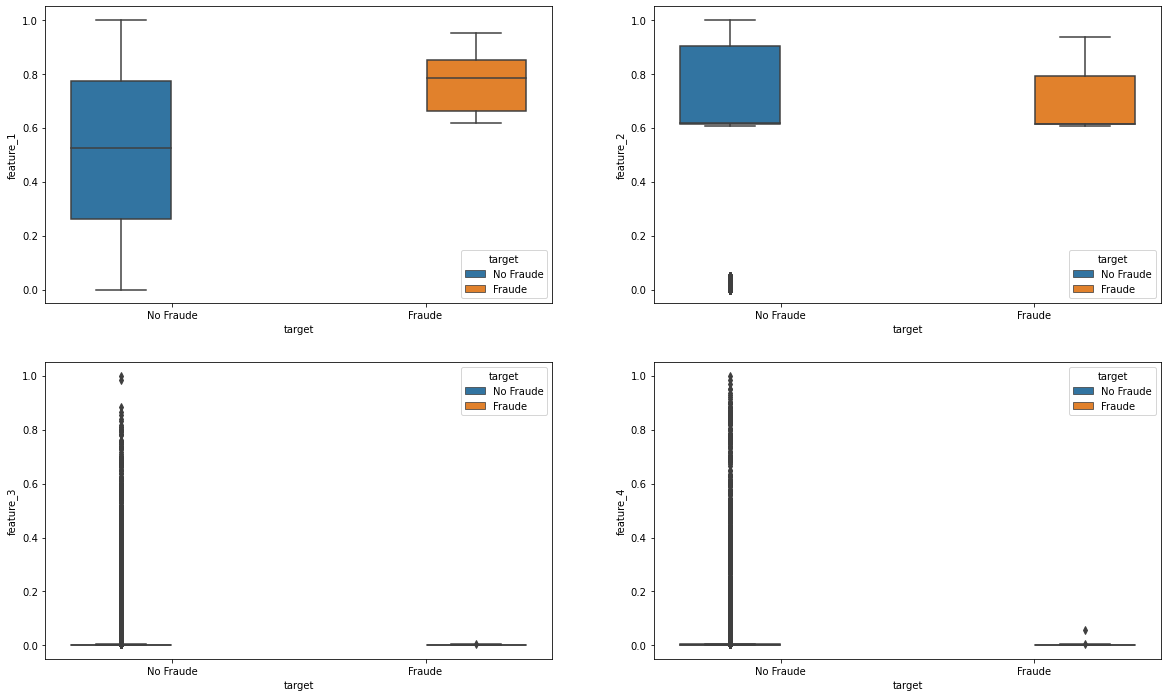

In [94]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='feature_1',x = 'target', hue = 'target',data = df_clientes_clasification, ax=axarr[0][0])
sns.boxplot(y='feature_2',x = 'target', hue = 'target',data = df_clientes_clasification, ax=axarr[0][1])
sns.boxplot(y='feature_3',x = 'target', hue = 'target',data = df_clientes_clasification, ax=axarr[1][0])
sns.boxplot(y='feature_4',x = 'target', hue = 'target',data = df_clientes_clasification, ax=axarr[1][1])

Al notar la presencia de valores atipicos, se calcularon los valores estadistico de cada clase para ver que tanto afectaban estos en los datos

In [135]:
df_clientes_clasification[['feature_1', 'feature_2', 'feature_3', 'feature_4']][df_clientes_clasification.target == 'Fraude'].describe()

,feature_1,feature_2,feature_3,feature_4
count,39.000000,39.000000,39.000000,39.000000
mean,0.758852,0.684254,0.000938,0.003090
std,0.105802,0.118193,0.001174,0.008998
min,0.619048,0.607869,0.000000,0.000000
25%,0.660714,0.612886,0.000000,0.000725
50%,0.785714,0.615243,0.000492,0.001449
75%,0.851190,0.792049,0.001640,0.002484
max,0.952381,0.936317,0.004592,0.057350


Al notar que las columnas 'feature 14', 'feature 15' y 'feature 16' solamente tienen un unico valor para todos los registros estas se eliminaron pues no aportan información para el modelo.

In [49]:
df_clientes_clasification= df_clientes_clasification.drop(['feature_14', 'feature_15', 'feature_16'], axis = 1)
print(df_clientes_clasification.nunique())

feature_1       85
feature_2     9342
feature_3     1270
feature_4     1135
feature_5        7
feature_6        3
feature_7        2
feature_8        7
feature_9        3
feature_10       3
feature_11      19
feature_12      12
feature_13       3
target           2
dtype: int64


Cambiamos los nombres de valores en las carcateristicas nominales como se muestra acontinuación

In [ ]:
df_clientes_clasification.loc[df_clientes_clasification['feature_11']== 'A', 'feature_11'] = 'A11'
df_clientes_clasification.loc[df_clientes_clasification['feature_11']== 'B', 'feature_11'] = 'B11'
df_clientes_clasification.loc[df_clientes_clasification['feature_11']== 'C', 'feature_11'] = 'C11'
'''
. 
. 
.
'''

Veamos como se ditribuye cada clase del conjunto en las caracteristicas nominales.

In [51]:
name_chateracter_value = list(set(df_clientes_clasification.target))
colores = ['blue', 'red']
dic_color_grafic = dict(zip(name_chateracter_value, colores))
name_target = ['No Fraude', 'Fraude']

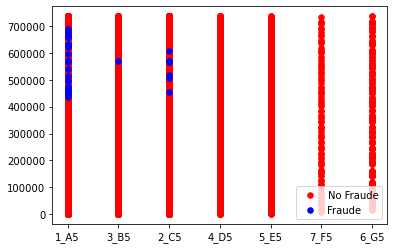

In [104]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

for i in name_target:
    ax1.scatter(
        df_clientes_clasification.feature_5[df_clientes_clasification.target == i],
        df_clientes_clasification.index[df_clientes_clasification.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

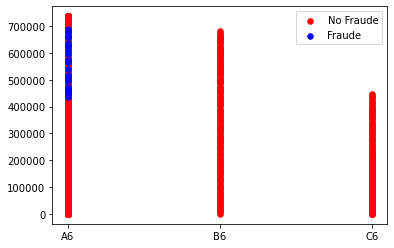

In [127]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

for i in name_target:
    ax1.scatter(
        df_clientes_clasification.feature_6[df_clientes_clasification.target == i],
        df_clientes_clasification.index[df_clientes_clasification.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

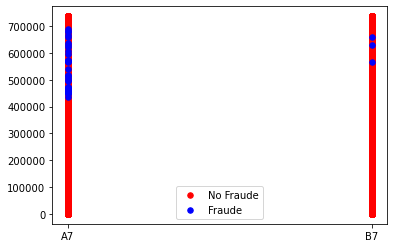

In [128]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

for i in name_target:
    ax1.scatter(
        df_clientes_clasification.feature_7[df_clientes_clasification.target == i],
        df_clientes_clasification.index[df_clientes_clasification.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

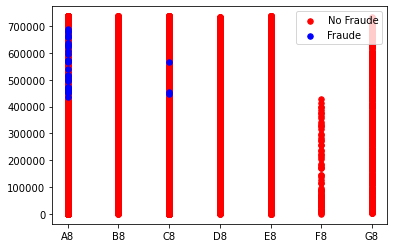

In [129]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

for i in name_target:
    ax1.scatter(
        df_clientes_clasification.feature_8[df_clientes_clasification.target == i],
        df_clientes_clasification.index[df_clientes_clasification.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

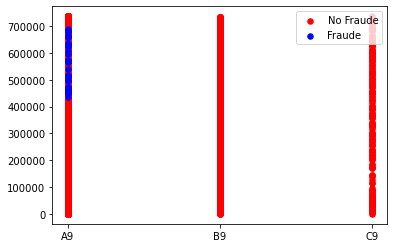

In [130]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

for i in name_target:
    ax1.scatter(
        df_clientes_clasification.feature_9[df_clientes_clasification.target == i],
        df_clientes_clasification.index[df_clientes_clasification.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

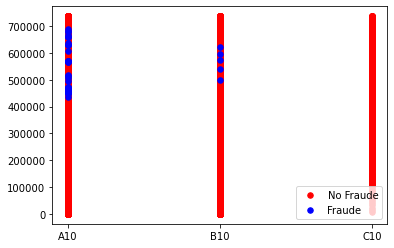

In [131]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

for i in name_target:
    ax1.scatter(
        df_clientes_clasification.feature_10[df_clientes_clasification.target == i],
        df_clientes_clasification.index[df_clientes_clasification.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

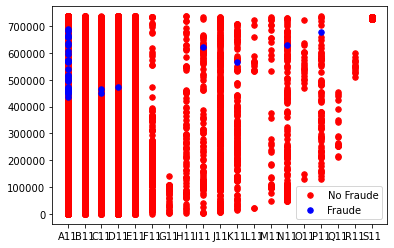

In [132]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

for i in name_target:
    ax1.scatter(
        df_clientes_clasification.feature_11[df_clientes_clasification.target == i],
        df_clientes_clasification.index[df_clientes_clasification.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

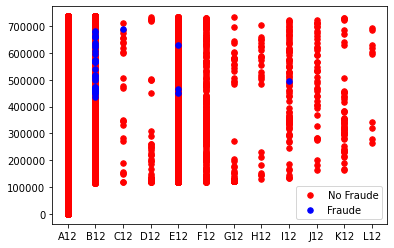

In [133]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

for i in name_target:
    ax1.scatter(
        df_clientes_clasification.feature_12[df_clientes_clasification.target == i],
        df_clientes_clasification.index[df_clientes_clasification.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

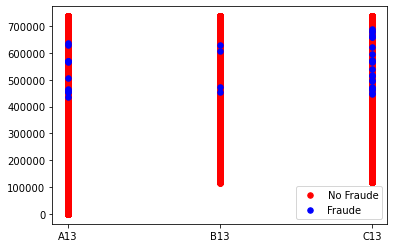

In [91]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

for i in name_target:
    ax1.scatter(
        df_clientes_clasification.feature_13[df_clientes_clasification.target == i],
        df_clientes_clasification.index[df_clientes_clasification.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()